In [2]:
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


os.chdir(os.getcwd())
os.getcwd()


data = pd.read_csv("etongueData.csv")
y = data.Sample
x = data.drop('Sample', 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

pred = clf.predict(x_test)

acc = accuracy_score(y_test, pred)
print acc

tree.export_graphviz(clf, out_file='firstTree.dot')

0.72972972973


In [45]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear', C = 100)
clf.fit(x_train, y_train)

pred = clf.predict(x_test)

acc = accuracy_score(y_test, pred)
print acc



0.837837837838


In [47]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators = 1000, n_jobs = -1)
clf.fit(x_train, y_train)

pred = clf.predict(x_test)

acc = accuracy_score(y_test, pred)
acc


0.91891891891891897

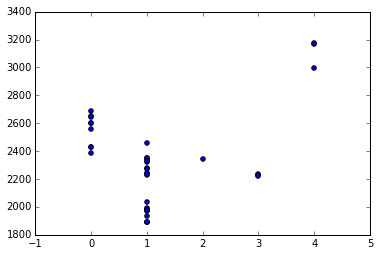

In [52]:
from sklearn.cluster import KMeans

y2 = data.ALCOHOL
x2 = data.drop('Sample', 1)
x2 = x2.drop('ALCOHOL', 1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = .2)

clf = KMeans(n_clusters = 5)
clf.fit(x_train2, y_train2)

pred = clf.predict(x_test2)

pred

plt.scatter(pred, x_test2[:,1])
plt.show()



In [67]:
from sklearn.cross_validation import KFold
from sklearn import tree

cv = KFold(len(data), n_folds=3)
count = 1
pred = []
for train_index, test_index in kf:
    clf = tree.DecisionTreeClassifier()

    
    print 'Accuracy score #' + str(count) + ': ' + str(acc)
    count =count+1

ValueError: attempt to get argmax of an empty sequence

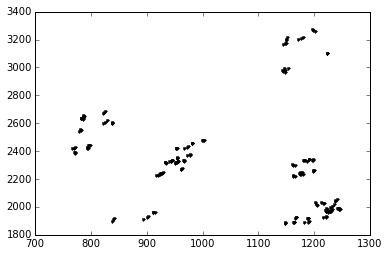

In [60]:
plt.plot(data.SRS, data.GPS, 'k.')

In [61]:
from dusty import dataprep
from dusty import runGaussian

x1, x2, y1, y2 = dataprep('/Users/dusty/Documents/Machine Learning/Vixie/etongueData.csv', 'Sample', .2)
np.shape(x1)
clf = runGaussian(x1, x2, y1, y2)

Accuracy Score:0.27027027027


In [4]:
from dusty import regOLS
reg = regOLS(data, 'ALCOHOL', ('SRS', 'GPS', 'STS', 'UMS', 'SPS', 'SWS', 'BRS'), intercept = 1)

print 'Covariate'.ljust(20) + 'Coefficient'.ljust(20) + 'Standard Error'.ljust(20) + 'T-Value'.ljust(20) + 'Pr(>|t|)'.ljust(20)
for i in range(7):
    print str(reg['Covariates'][i]).ljust(20) + str(reg['Coef'][i]).ljust(20) + str(reg['StdErr'][i]).ljust(20) + str(reg['Tstat'][i]).ljust(20) + str(reg['Pval'][i]).ljust(20)
    

Covariate           Coefficient         Standard Error      T-Value             Pr(>|t|)            
SRS                 -0.000481443714547  [ 0.00089939]       [-0.53529986]       [ 0.29656105]       
GPS                 0.000256812112743   [ 0.0003244]        [ 0.79166086]       [ 0.21481509]       
STS                 -0.000778400731335  [ 0.00119422]       [-0.65180837]       [ 0.25768996]       
UMS                 0.000472726965279   [ 0.00013022]       [ 3.6302316]        [ 0.00018579]       
SPS                 -4.06778073435e-05  [  5.69610416e-05]  [-0.71413384]       [ 0.23804792]       
SWS                 0.0100077276406     [ 0.00297693]       [ 3.3617639]        [ 0.00047555]       
BRS                 0.000136318038999   [ 0.00012674]       [ 1.07553525]       [ 0.14180787]       


In [55]:
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dusty import cvTree

data = pd.read_csv("/Users/Dusty/Documents/Machine Learning/Vixie/etongueData.csv")

clf = cvTree(data, 'Sample')



0
1
2
3
4
5
6
7
8
9
[[ 0.        ]
 [ 0.11111111]
 [ 0.11111111]
 [ 0.21052632]
 [ 0.11111111]
 [ 0.16666667]
 [ 0.05263158]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]


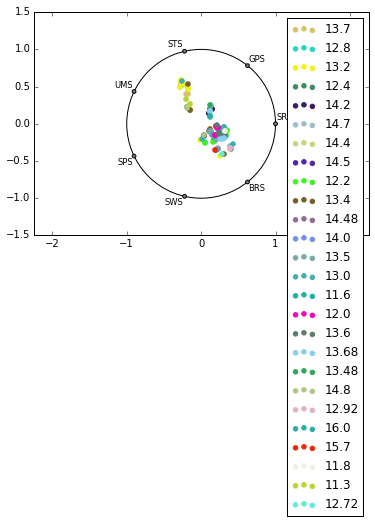

In [12]:
from pandas.tools.plotting import radviz
dataviz = data[['ALCOHOL', 'SRS', 'GPS', 'STS', 'UMS', 'SPS', 'SWS', 'BRS']]
radviz(dataviz, 'ALCOHOL')
plt.show()

y = dataviz.ALCOHOL
x = dataviz.drop('ALCOHOL', 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)
clf = tree.DecisionTreeRegressor()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)


tree.export_graphviz(clf, out_file='shortTree.dot')


In [9]:
data

,Sample,SRS,GPS,STS,UMS,SPS,SWS,BRS,SOLIDS,PH,TA,ALCOHOL,LPP,SPP,TANNINS,PHENOLICS,PROTEINS,MANNOPR
0,14H-10,828.840471,2622.872057,772.353386,1069.215686,1188.553371,1061.268557,-542.366100,8.4,3.55,0.54,13.70,0.776,1.037,469,164,90.01,86.53
1,14H-10,824.394729,2610.450129,769.375029,1068.634543,1188.553371,1061.965929,-555.107657,8.4,3.56,0.52,13.70,0.760,1.071,475,165,82.01,40.80
2,14H-10,821.532600,2604.871157,765.161743,1074.707486,1197.938829,1063.186329,-554.032543,8.5,3.55,0.53,13.70,0.816,1.063,425,176,70.01,227.78
3,181-10,781.143171,2556.273086,753.059443,1058.508129,1173.864986,1047.059614,-575.578414,8.2,3.47,0.55,12.80,0.632,0.874,400,126,110.01,72.50
4,181-10,781.869600,2551.260729,746.565171,1057.767171,1171.830986,1047.146786,-576.261257,8.2,3.48,0.56,13.20,0.688,0.866,396,135,92.01,131.00
5,181-10,778.440857,2542.659814,754.541357,1062.735943,1178.543186,1048.149257,-574.488771,8.1,3.47,0.56,12.80,0.704,0.840,393,136,108.01,189.50
6,An-11,951.476143,2425.051029,780.968829,7.453157,905.885486,1067.109043,1509.010071,8.1,3.51,0.58,12.40,0.304,0.917,130,77,76.01,197.10
7,An-11,952.158986,2419.835271,783.177171,10.082829,907.614386,1067.820943,1516.390586,8.1,3.50,0.56,12.40,0.336,0.891,133,83,76.01,292.74
8,An-11,954.091286,2421.680400,785.617971,12.044186,910.854257,1067.472257,1530.977271,8.1,3.50,0.58,12.40,0.304,0.943,136,84,76.01,81.45
9,AT-08,1219.659043,1978.588029,780.024471,817.086857,1103.532171,1109.576057,1538.822700,8.8,3.83,0.57,14.20,1.040,1.080,462,185,93.01,82.50


In [106]:
###### IMPORT STATEMENTS
from __future__ import division
from sklearn import tree
from sklearn import ensemble
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import svm
from dusty import balance_sets

##### IMPORT DATA AND BREAK INTO TRAINING AND TESTING DATA

data = pd.read_csv('/Users/Dusty/Documents/Machine Learning/vixielab/etongueData.csv')

data = data.drop(data.index[[22,47,133,170]])


ylab = ('SRS','GPS','STS','UMS','SPS','SWS','BRS')
xlab = ('SOLIDS','PH','TA','ALCOHOL','LPP','SPP','TANNINS','PHENOLICS','PROTEINS','MANNOPR')

y = data[['SRS','GPS','STS','UMS','SPS','SWS','BRS']]
x = data[['SOLIDS','PH','TA','ALCOHOL','LPP','SPP','TANNINS','PHENOLICS','PROTEINS','MANNOPR']]

scores = np.zeros(10)
for i in range(10):
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = .1)

    ##### RANDOM FOREST REGRESSOR - BEST PERFORMANCE TO DATE - RSQ = .67

    clf = ensemble.RandomForestRegressor(n_estimators = 10000, n_jobs = -1)
    clf.fit(xtrain, ytrain)

    scores[i] = clf.score(xtest,ytest)

print np.mean(scores)


0.631341614338


In [107]:
scores

array([ 0.6306704 ,  0.30091962,  0.68017295,  0.42705021,  0.61221742,
        0.74261377,  0.76481931,  0.6484477 ,  0.78113808,  0.72536667])

In [114]:
pred = clf.predict(xtest)
acc = np.zeros(np.shape(ytest))
for i in range(np.shape(ytest)[0]):
    for j in range(np.shape(ytest)[1]):
        if abs(pred[i][j]-ytest[i][j]) < 200:
            acc[i][j]=1

accrow = np.zeros(np.shape(ytest)[0])

for i in range(np.shape(ytest)[0]):
    accrow[i] = np.mean(acc[i,:])
    
    
acccol = np.zeros(np.shape(ytest)[1])

for i in range(np.shape(ytest)[1]):
    acccol[i] = np.mean(acc[:,i])
    
acc = np.mean(accrow)

In [115]:
acccol

array([ 0.88888889,  0.77777778,  1.        ,  0.72222222,  0.72222222,
        1.        ,  0.61111111])

In [ ]:
y = pd.DataFrame()

for i in ylab:
  y = y.append(data[i])

x = pd.DataFrame()

for i in xlab:
  x = x.append(data[i])

x = x.T
y = y.T

impval = np.zeros((len(xlab),1))
rsq = 0


##### RUN DECISION TREE REGRESSOR 1000 TIMES AND REPORT AVERAGE FEATURE IMPORTANCE

for time in range(1000):

  xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = .2)

  clf = tree.DecisionTreeRegressor()

  clf.fit(xtrain, ytrain)

  pred = clf.score(xtest, ytest)

  for count in range(len(xlab)):
    impval[count] = impval[count] + clf.feature_importances_[count]
  rsq = rsq + clf.score(xtest,ytest)


# xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = .2)

# clf = tree.DecisionTreeRegressor()

# clf.fit(xtrain, ytrain)

# pred = clf.score(xtest, ytest)

# impval = clf.feature_importances_
# rsq = clf.score(xtest,ytest)

print '\n'
print 'Average Feature Importance (Gini Importance)'
print '-'*40
for i in range(len(xlab)):
  print(xlab[i]).ljust(20) + str(impval[i]/1000).ljust(20)

print '-'*40
print 'Mean R-squared'.ljust(20) + str(rsq/1000)
print '\n'

#scores = np.zeros((len(ylab),1))
#xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = .2)
#for i in range(len(ylab)):
#    clf = svm.SVR(kernel = 'linear', C = 1, epsilon = .1, degree = 3)
#    clf.fit(xtrain, ytrain[:,i])
#    scores[i] = clf.score(xtest, ytest[:,i])
#    
#print 'Scores for SVR:\n'
#print scores    

In [87]:
data2 = data.groupby(['Sample'])
data3 = data2.aggregate(np.median)
data3

,SRS,GPS,STS,UMS,SPS,SWS,BRS,SOLIDS,PH,TA,ALCOHOL,LPP,SPP,TANNINS,PHENOLICS,PROTEINS,MANNOPR
Sample,,,,,,,,,,,,,,,,,
14H-10,824.394729,2610.450129,769.375029,1069.215686,1188.553371,1061.965929,-554.032543,8.4,3.55,0.53,13.70,0.776,1.063,469,165,82.01,86.53
181-10,781.143171,2551.260729,753.059443,1058.508129,1173.864986,1047.146786,-575.578414,8.2,3.47,0.56,12.80,0.688,0.866,396,135,108.01,131.00
AT-08,1221.489643,1984.907957,780.024471,817.086857,1103.532171,1108.965857,1538.822700,8.8,3.83,0.58,14.40,1.120,1.080,463,191,94.01,165.48
An-11,952.158986,2421.680400,783.177171,10.082829,907.614386,1067.472257,1516.390586,8.1,3.50,0.58,12.40,0.304,0.917,133,83,76.01,197.10
BF,944.575071,2326.576371,760.701471,-79.311471,858.696686,1046.914329,1570.131771,8.6,3.65,0.53,12.20,0.696,1.466,349,155,106.01,121.90
BO-10,823.130743,2677.862700,750.575057,1173.225729,1249.602429,1039.170600,-540.738900,7.9,3.57,0.56,13.70,0.880,1.174,394,155,90.01,151.30
BS-10,1176.596357,2233.796914,831.571843,-119.192400,2096.589086,1132.618371,722.898129,7.6,3.58,0.66,13.20,1.120,0.746,591,154,68.01,142.88
BV-11,943.354671,2331.632314,756.473657,-74.778557,863.578286,1057.447543,1588.655700,8.0,3.60,0.54,13.20,0.344,1.029,241,123,86.01,222.13
Be-10,1202.718729,2018.091214,780.474857,840.724843,1109.968329,1140.420214,1479.880286,9.2,3.51,0.63,14.20,1.424,1.543,532,166,121.01,83.24
